# Árboles de decisión

La clase pasada vimos como implementar un árbol de decisión con sklearn. Ahora que conocemos el procedimiento para armar las condiciones mediante el criterio Gini, armemos nuestro propio árbol...

Hay que tener en cuenta que esto es simplemente para tener una idea de como funcionan estos algoritmos por detrás, pero en la práctica no tiene sentido crear una nueva implementación de árboles de decisión ya que sklearn lo hace muy bien y tiene una gran comunidad que está constantemente desarrollando nuevas soluciones que seguramente funcionen mejor de lo que podemos crear nosotros solos desde cero.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

Vamos a trabajar con el dataset de titanic (mismo que la clase pasada). Buscaremos predecir si una persona sobrevivió o no.

Vamos a utilizar como punto de partida la siguiente función (que tendrán que editar ustedes):

In [6]:
def predict(x):
    prediction = 0 # MODIFICAR
    
    #### EJEMPLO
    if x["Age"] < 5:
        prediction = 1
    else:
        prediction = 0
    
    return prediction

Leer el dataset de titanic:


In [8]:
df = # COMPLETAR

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Separar en una variable "X" las features que utilizaremos para predecir y en una variable "y" el target que queremos predecir (sobrevivió o no)

In [15]:
X = #COMPLETAR
y = #COMPLETAR

In [12]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Ahora, con la función predict que creamos, predecimos para todas las instancias:

In [19]:
y_predicted = []

for x in X.itertuples(): 
    y_i = predict(x) 
    y_predicted.append(y_i)

print(y_predicted)

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Poner el código de la celda anterior en una función que se llame predict_all, reciba como parámetro X y retorne la lista y_predicted

In [20]:
# COMPLETAR

Calculamos el accuracy de nuestro árbol de decisión (que hasta ahora simplemente predice 1 si la edad es menor a 5):

In [23]:
print("Accuracy: ", round(accuracy_score(y_predicted, y), 3))

Accuracy:  0.632


Ahora, para mejorar este simple modelo baseline, utilizaremos lo que aprendimos en la teoría sobre impureza Gini para crear mejores condiciones en nuestra función predict.

### Impureza Gini

Vamos a calcular que tan buenas son las condiciones por Género y Clase para predecir si los pasajeros sobrevivieron o no.


1) Calcular la impureza Gini luego de separar por género.

Recuerden los pasos:

- Calcular la impureza correspondiente al género masculino
- Calcular la impureza correspondiente al género femenino
- Hacer un promedio ponderado

Utilizando una máscara, almacenamos en las variables y_female, y_male la columna survived correspondiente a cada género:

In [24]:
y_female = df[COMPLETAR].Survived
y_male = df[COMPLETAR].Survived

In [25]:
y_female

1      1
2      1
3      1
8      1
9      1
      ..
880    1
882    0
885    0
887    1
888    0
Name: Survived, Length: 314, dtype: int64

In [26]:
y_male

0      0
4      0
5      0
6      0
7      0
      ..
883    0
884    0
886    0
889    1
890    0
Name: Survived, Length: 577, dtype: int64

Ahora, recuenden la fórmula:

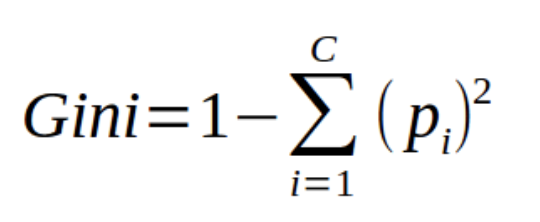



Tenemos que contar para y_female, y_male, la cantidad de muestras positivas y negativas (1s y 0s).

Arranquemos por y_female

In [ ]:
muestras_neg = #COMPLETAR
muestras_pos = #COMPLETAR

Necesitamos N (el largo total de la muestra) para poder calcular las probabilidades. N de y_female va a ser igual a el tamaño de y_female:

In [ ]:
N = #COMPLETAR

Ahora estamos listos para aplicar la fórmula:

In [2]:
gini_female = #COMPLETAR

In [ ]:
print(gini_female)

Ahora tenemos que hacer lo mismo para y_male.

Calcular gini_male:

In [3]:
# COMPLETAR

Finalmente, podemos calcular la impureza Gini al separar por género. (Promedio ponderado).

Siguiendo lo que vimos en la teoría, calcular la impureza gini al separar por género:

Pueden guiarse con el ejemplo de la teoría:
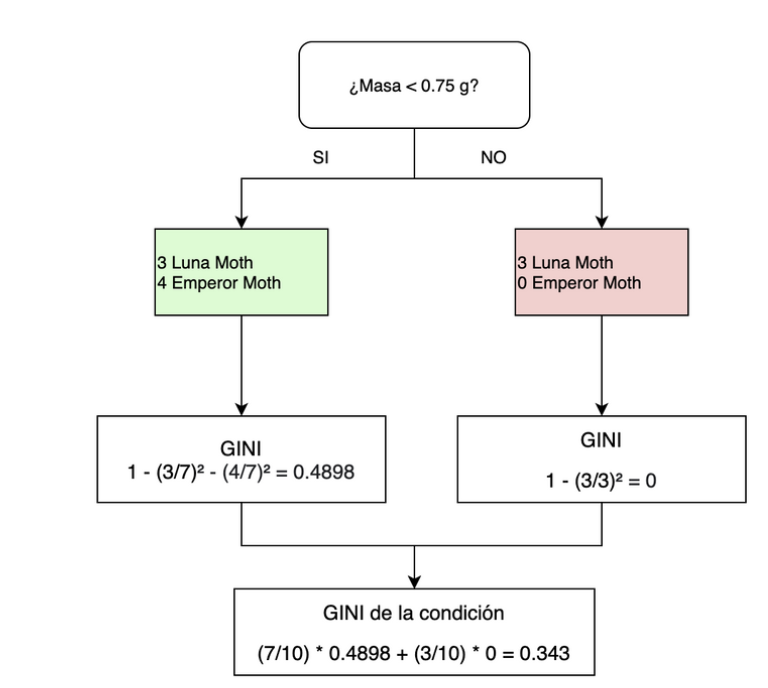

In [29]:
gini_genero = #COMPLETAR FORMULA
print(f'Impureza Gini al separar por Genero: {gini_genero}')

Impureza Gini al separar por Genero: 0.13760148246050435


Ahora, hacer lo mismo para la variable Clase.

Recuerden que la variable clase tiene 3 categorías, por lo que van a tener 3 hojas y tienen que hacer el cálculo para cada una de ellas.

In [4]:
# COMPLETAR GINI CLASE

## Volvamos a sklearn

Ya vimos como se arma un árbol "a mano". Ahora, volvamos a sklearn 🙌🏻.

La clase pasada entrenamos un modelo para clasificar sobre este mismo dataset.

Vamos a basarnos en el mismo modelo pero haciendo un train - test split.

1) Basandonos en la documentación https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Vemos que uno de los atributos más importantes en train-test split es test_size. Con este parámetro, podemos aclarar que porcentaje de los datos queremos que queden como test.

Otro atributo importante es stratify. 

¿ Para qué sirve stratify ? En la documentación no está muy explicado, pero siempre podemos googlear. Por ejemplo, aca hay una buena respuesta: https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

In [5]:
# IMPORTAR train_test_split de sklearn

Ahora, aplicamos el train_test_split:

In [ ]:
X = df.drop([COLUMNAS], axis=1)# Basarse en las columnas que eligieron para su modelo la clase pasada
y = df["Survived"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

Ya tenemos nuestros datos divididos en train - test.

Ahora, hay que aplicar todo el preprocesamiento que decidieron hacer la última clase (copiar y pegar) sobre el set de train.


In [8]:
# COMPLETAR PREPROCESSING TRAIN

Entrenamos nuestro decision tree

In [ ]:
# Entrenar decision tree

Y ahora lo queremos evaluar.

Para esto, vamos a medir el accuracy score con el set de train (X_train, y_train) y con el set de test (X_test, y_test).

Para poder generar predicciones sobre X_test, tenemos que aplicar el mismo preprocesamiento que hicimos sobre el set de train, pero esta vez al set de test.

Para esto, tenemos que utilizar los mismos objetos que utilizamos para transformar los datos en train; es decir, que si utilizaron un OneHotEncoder al cual le hicieron fit con datos de train, cuando vayan a aplicar la transformación a los datos de test NO tienen que volver a hacer el fit. Simplemente hacen un transform. Esto es para que se aplique sobre test la misma transformación que se aplico en train.

Siempre hacemos fit sobre los datos de train y luego solo utilizamos transform.

Aplicar las transformaciones sobre el set de test:

In [9]:
# COMPLETAR

Generar las predicciones para train y para test:

In [ ]:
train_preds = MODELO.predict(X_train)
test_preds = MODELO.predict(X_test)

Y calcular el accuracy score para ambos:

In [ ]:
accuracy_score(y_train, train_preds)

In [ ]:
accuracy_score(y_test, test_preds)

¿ Qué conclusiones pueden sacar de estos resultados ?

¿ El modelo es bueno para predecir sobre datos nuevos ?

¿ Les dio mejor la métrica en train o en test ? ¿ Por qué ?

Un modelo que nos de métricas muy buenas sobre el set de train (por ejemplo 98% de accuracy score) pero malas sobre test. ¿ Qué problema tiene ?

# Visualizando decision trees

SKlearn nos permite ver como se armó un arbol de decisión.

Para esto podemos utilizar: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

Primero que nada vamos a importar el dataset de iris desde sklearn y dividirlo en X e y para entrenar un árbol (por simplicidad le ponemos max_depth=2):

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = pd.DataFrame(iris.data[:, :], columns = iris.feature_names[:])
y = pd.DataFrame(iris.target, columns =["Species"])

tree = DecisionTreeClassifier(max_depth = 2)
tree.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


Ahora, con plot_tree de sklearn, podemos visualizar nuestro árbol para entender como toma decisiones para clasificar:

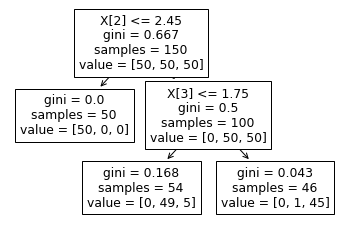

In [10]:
from sklearn.tree import plot_tree

plot_tree(tree)
plt.show()